<a href="https://colab.research.google.com/github/mylibui/demo/blob/master/AE_VAE_Modelle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)
import optuna
print(optuna.__version__)

tf.config.list_physical_devices('GPU')

2.18.0
4.2.1


/opt/homebrew/anaconda3/envs/autoencoder-dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import numpy as np
import os
from data import load

In [3]:
file_path= 'Data/creditcard.csv'

data = load(file_path)

In [ ]:

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
# Konvertiere X und y zu float32 für TensorFlow und forme y zu (batch_size, 1)
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = np.expand_dims(y_train.astype(np.float32), axis=-1)  # Shape (n_samples, 1)
y_test = np.expand_dims(y_test.astype(np.float32), axis=-1)    # Shape (n_samples, 1)

X_train shape: (227845, 29)
y_train shape: (227845, 1)
y_train unique values: [0. 1.]
y_train dtype: float32
X_train dtype: float32


In [ ]:
for model_name, model in models.items():
    print(f"\nThreshold-Sensitivitätsanalyse für {model_name}...")

    # Berechnung des Rekonstruktionsfehlers
    reconstruction_error = calculate_reconstruction_error(model, X_test)

    # Testen verschiedener Schwellenwerte
    thresholds = np.arange(0.1, 5.0, 0.1)
    f1_scores = []
    precisions = []
    recalls = []

    for threshold in thresholds:
        fraud_predictions = detect_fraud(model, X_test, threshold=threshold)
        metrics = evaluate_fraud_detection(model, X_test, np.squeeze(y_test), threshold=threshold, save_metrics=False)
        f1_scores.append(metrics['F1-Score'])
        precisions.append(metrics['Precision'])
        recalls.append(metrics['Recall'])

    # Visualisierung
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.title(f"Threshold-Sensitivitätsanalyse für {model_name}")
    plt.xlabel("Schwellenwert")
    plt.ylabel("Metrik")
    plt.legend()
    plt.grid(True)

    # Speichern in Google Drive
    base_dir = "/content/drive/MyDrive"
    folder_path = os.path.join(base_dir, f"vae_results/threshold_sensitivity_{model_name.lower()}")
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    save_path = os.path.join(folder_path, f"threshold_sensitivity_{model_name}_{timestamp}.png")
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Threshold-Sensitivitätsplot wurde gespeichert unter: {save_path}")
    best_f1 = max(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Bester F1-Score: {best_f1:.4f} bei Schwellenwert {best_threshold:.2f}")


Threshold-Sensitivitätsanalyse für UnsupervisedAE...

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       0.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0017
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       0.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0017
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0018
ROC-AUC: 0.5000

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.02      0.03     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.03     56962


Metriken:
Precision: 0.0018
Recall: 1.0000
F1-Score: 0.0035
Accuracy: 0.0194
ROC-AUC: 0.5089

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0020
ROC-AUC: 0.5001

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.02      0.04     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.04     56962


Metriken:
Precision: 0.0018
Recall: 1.0000
F1-Score: 0.0035
Accuracy: 0.0200
ROC-AUC: 0.5092

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       0.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0017
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0018
ROC-AUC: 0.5000

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.02      0.04     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.04     56962


Metriken:
Precision: 0.0018
Recall: 1.0000
F1-Score: 0.0035
Accuracy: 0.0197
ROC-AUC: 0.5090

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       0.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0017
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.00      0.00     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.50      0.50      0.00     56962
weighted avg       1.00      0.00      0.00     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0034
Accuracy: 0.0018
ROC-AUC: 0.5000

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00      0.01      0.02     56864
       Fraud       0.00      1.00      0.00        98

    accuracy                           0.01     56962
   macro avg       0.50      0.51      0.01     56962
weighted avg       1.00      0.01      0.02     56962


Metriken:
Precision: 0.0017
Recall: 1.0000
F1-Score: 0.0035
Accuracy: 0.0141
ROC-AUC: 0.5062

Klassifikationsbericht:
              precision    recall  f1-score   support

 Nicht Fraud       1.00     

In [12]:
# Vorbereitung der Daten für Optuna (reduzierte Untermenge für schnellere Ausführung)
X_train_subset = X_train[:10000]  # Reduziere auf 10,000 Beispiele
y_train_subset_unsupervised = y_train_unsupervised[:10000]  # Für Unsupervised
y_train_subset_supervised = y_train[:10000]  # Für Supervised

NameError: name 'y_train_unsupervised' is not defined

In [4]:
from src.hyperparameters import run_optuna_study, build_objective_uae
import optuna
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

study_uae = run_optuna_study(
    direction="maximize", 
    pruner=optuna.pruners.MedianPruner(),
    objective_function=build_objective_uae(data.X_train, data.y_train, skf),
    n_trials=2,
)

best_params = study_uae.best_params
best_params_dict[model_name] = best_params
print(f"Beste Parameter für {model_name}: {best_params}")
print(f"Bester durchschnittlicher ROC-AUC (5-Fold): {study_uae.best_value:.4f}")

[I 2025-03-03 09:31:06,703] A new study created in memory with name: no-name-d201b168-6266-4648-9af7-ff63f4b2dc4c
2025-03-03 09:31:06.756681: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-03 09:31:06.756714: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-03 09:31:06.756723: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1740990666.756734 11802633 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1740990666.756750 11802633 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-03-03 09:31:07.499297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enab

KeyboardInterrupt: 

<ipython-input-58-f7ad013fdfa5>:5: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

<ipython-input-58-f7ad013fdfa5>:6: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



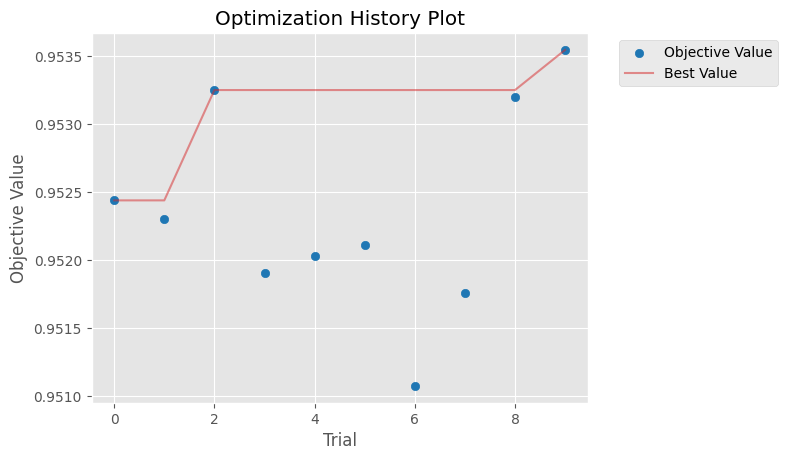

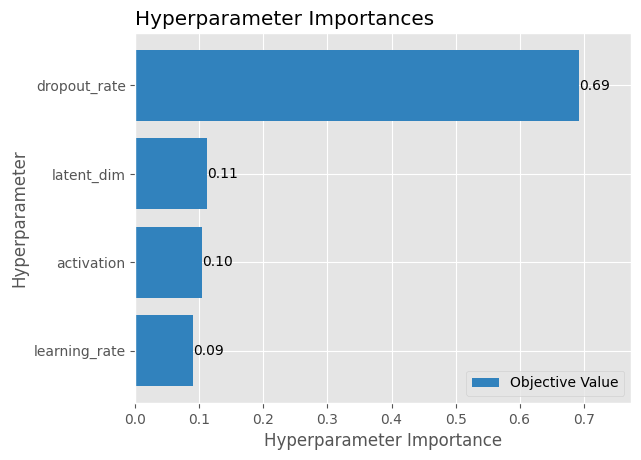

In [ ]:
import matplotlib.pyplot as plt

# UAE
axes[0, 0].set_title('UAE Hyperparameter Optimization')
hyperparameters.visualization.matplotlib.plot_optimization_history(study_uae)
hyperparameters.visualization.matplotlib.plot_param_importances(study_uae)
fig.show()

In [ ]:
# Dictionary zur Speicherung der besten Parameter
# Optimierung nur für UnsupervisedAE
model_class = UnsupervisedVAE
model_type = 'uvae'
model_name = model_class.__name__
print(f"\nStarte Hyperparameter-Optimierung mit Optuna für {model_name} (ROC-AUC mit StratifiedKFold)...")

# Erstelle eine Optuna-Studie
study_uvae = hyperparameters.create_study(direction='maximize', pruner=hyperparameters.pruners.MedianPruner())

# Führe 20 Trials durch
study_uvae.optimize(objective_uvae, n_trials=10)

# Speichere die besten Parameter
best_params = study_uvae.best_params
best_params_dict[model_name] = best_params
print(f"Beste Parameter für {model_name}: {best_params}")
print(f"Bester durchschnittlicher ROC-AUC (5-Fold): {study_uvae.best_value:.4f}")


[I 2025-03-01 22:22:47,084] A new study created in memory with name: no-name-22db5762-ef66-40a6-893d-a11c1dc0ef31



Starte Hyperparameter-Optimierung mit Optuna für UnsupervisedVAE (ROC-AUC mit StratifiedKFold)...


[I 2025-03-01 22:29:10,951] Trial 0 finished with value: 0.6815986641499757 and parameters: {'latent_dim': 8, 'activation': 'swish', 'learning_rate': 0.009141645316304509, 'dropout_rate': 0.1287591411256764, 'kl_weight': 1.0207836873268523}. Best is trial 0 with value: 0.6815986641499757.
[I 2025-03-01 22:36:42,742] Trial 1 finished with value: 0.9527710754438194 and parameters: {'latent_dim': 2, 'activation': 'mish', 'learning_rate': 0.0006584784838204952, 'dropout_rate': 0.17107994679931565, 'kl_weight': 0.5399747870696118}. Best is trial 1 with value: 0.9527710754438194.
[I 2025-03-01 22:44:36,887] Trial 2 finished with value: 0.9538653973621279 and parameters: {'latent_dim': 16, 'activation': 'mish', 'learning_rate': 0.00016379626343164197, 'dropout_rate': 0.031870946623092665, 'kl_weight': 1.7476191284152147}. Best is trial 2 with value: 0.9538653973621279.
[I 2025-03-01 22:51:21,635] Trial 3 finished with value: 0.9562085316815155 and parameters: {'latent_dim': 2, 'activation': '

Beste Parameter für UnsupervisedVAE: {'latent_dim': 2, 'activation': 'mish', 'learning_rate': 0.0002129245143569626, 'dropout_rate': 0.04612158099861335, 'kl_weight': 1.4441870859313692}
Bester durchschnittlicher ROC-AUC (5-Fold): 0.9564


<ipython-input-66-e7b765d392a7>:3: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

<ipython-input-66-e7b765d392a7>:4: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



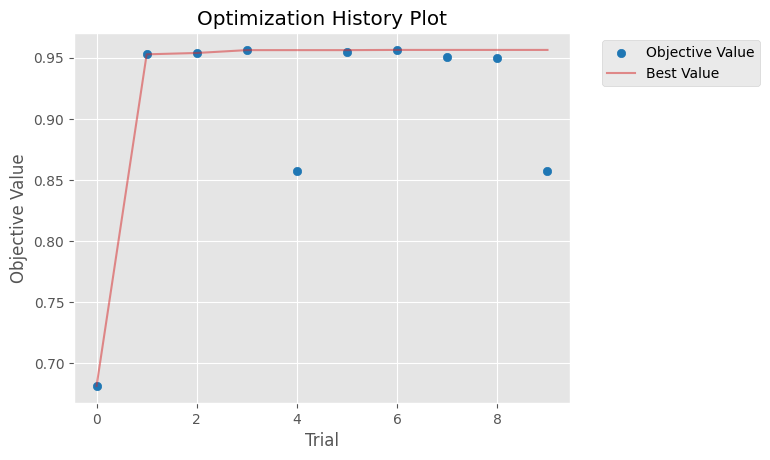

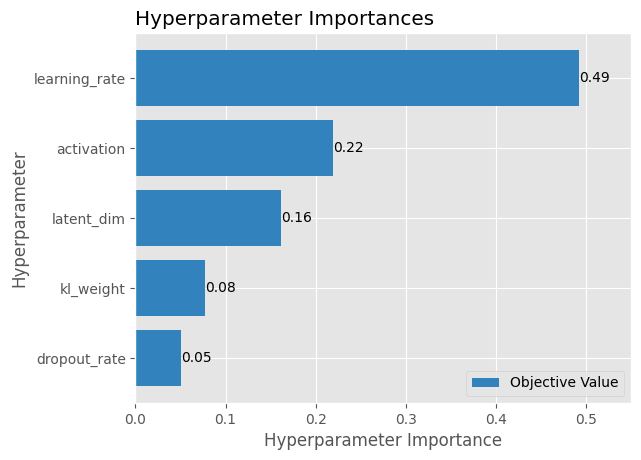

In [ ]:
# UAE
import optuna
axes[0, 0].set_title('UAE Hyperparameter Optimization')
optuna.visualization.matplotlib.plot_optimization_history(study_uvae)
optuna.visualization.matplotlib.plot_param_importances(study_uvae)
fig.show()

In [ ]:

# Optimierung nur für SupervisedAE
model_class = SupervisedAE
model_type = 'sae'
model_name = model_class.__name__
print(f"\nStarte Hyperparameter-Optimierung mit Optuna für {model_name} (ROC-AUC mit StratifiedKFold)...")

# Erstelle eine Optuna-Studie
study_sae = hyperparameters.create_study(direction='maximize', pruner=hyperparameters.pruners.MedianPruner())

# Führe 20 Trials durch
study_sae.optimize(objective_sae, n_trials=10)

# Speichere die besten Parameter
best_params = study_sae.best_params
best_params_dict[model_name] = best_params
print(f"Beste Parameter für {model_name}: {best_params}")
print(f"Bester durchschnittlicher ROC-AUC (5-Fold): {study_sae.best_value:.4f}")

[I 2025-03-02 03:32:27,461] A new study created in memory with name: no-name-e5e6011a-d6e4-4b76-9af6-7ae52001b971



Starte Hyperparameter-Optimierung mit Optuna für SupervisedAE (ROC-AUC mit StratifiedKFold)...


[I 2025-03-02 03:40:00,462] Trial 0 finished with value: 0.8007796147310868 and parameters: {'latent_dim': 8, 'activation': 'relu', 'learning_rate': 0.0030415972814613022, 'dropout_rate': 0.07172045417321903, 'l2_lambda': 0.0029612976444337025}. Best is trial 0 with value: 0.8007796147310868.
[I 2025-03-02 03:47:38,118] Trial 1 finished with value: 0.8490299759109057 and parameters: {'latent_dim': 8, 'activation': 'relu', 'learning_rate': 0.00011881407237894337, 'dropout_rate': 0.005138727211745376, 'l2_lambda': 0.029131633167917795}. Best is trial 1 with value: 0.8490299759109057.
[I 2025-03-02 03:55:02,005] Trial 2 finished with value: 0.7535984595397645 and parameters: {'latent_dim': 2, 'activation': 'swish', 'learning_rate': 0.00011054676055988568, 'dropout_rate': 0.15421772752222093, 'l2_lambda': 0.019860440622427877}. Best is trial 1 with value: 0.8490299759109057.
[I 2025-03-02 04:02:25,294] Trial 3 finished with value: 0.6942631943893278 and parameters: {'latent_dim': 2, 'activ

Beste Parameter für SupervisedAE: {'latent_dim': 8, 'activation': 'relu', 'learning_rate': 0.00011881407237894337, 'dropout_rate': 0.005138727211745376, 'l2_lambda': 0.029131633167917795}
Bester durchschnittlicher ROC-AUC (5-Fold): 0.8490


<ipython-input-89-5ac36d396884>:3: ExperimentalWarning:

plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.

<ipython-input-89-5ac36d396884>:4: ExperimentalWarning:

plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.



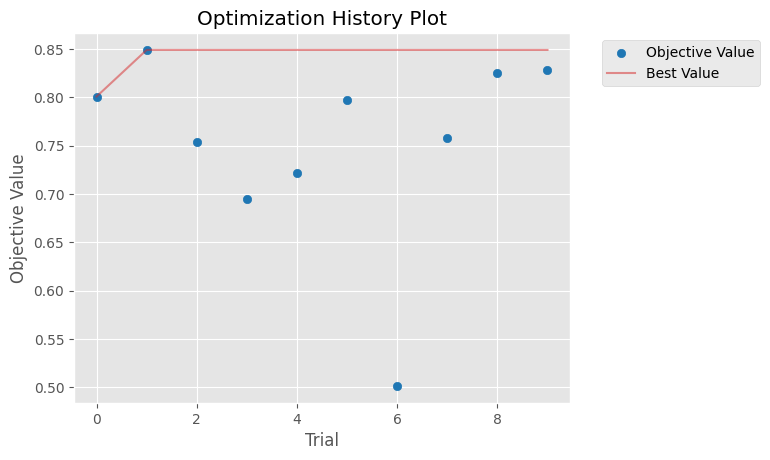

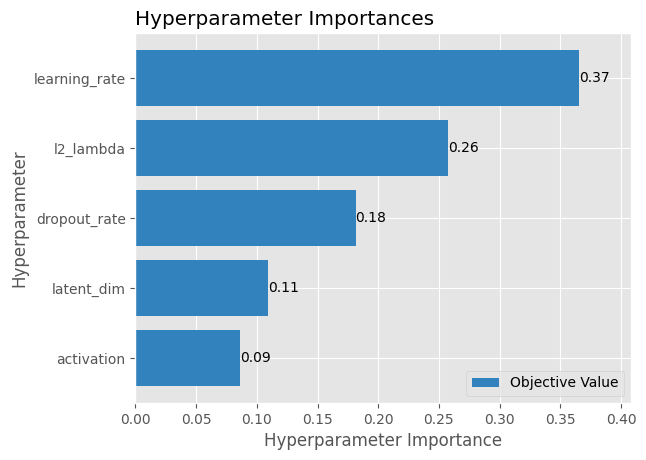

In [ ]:
# SAE
axes[0, 0].set_title('SAE Hyperparameter Optimization')
hyperparameters.visualization.matplotlib.plot_optimization_history(study_sae)
hyperparameters.visualization.matplotlib.plot_param_importances(study_sae)
fig.show()